In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import autocorr_mat, get_lagplot

In [35]:
data_path = f"{paths['livingstone_lab']}/tiziano/data"
monkey_name = "paul"
day = "0923"
npx = True
imec_n = 0
resolution_Hz = 60
if npx:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
else:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
# end if npx:

In [34]:
gaze_path

'/Volumes/LivingstoneLab/tiziano/data/neural_paul_250923_imec0_60Hz.pkl'

In [ ]:
with open(neural_path, "rb") as f:
    data = pickle.load(f)
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [36]:
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [33]:
data_gaze["steve1.mp4"].shape

(383, 722, 1)

In [4]:
stimuli_names = list(data.keys())

In [5]:
print(len(stimuli_names), stimuli_names)

10 ['stevetoB5.mp4', 'steve1.mp4', 'steve1_rev.mp4', 'stevetobluehat.mp4', 'steve1toAlle_rev.mp4', 'stevetoalle.mp4', 'steve1toBlondie_rev.mp4', 'steve1toBluehat_rev.mp4', 'steve1toB5_rev.mp4', 'stevetoblondie.mp4']


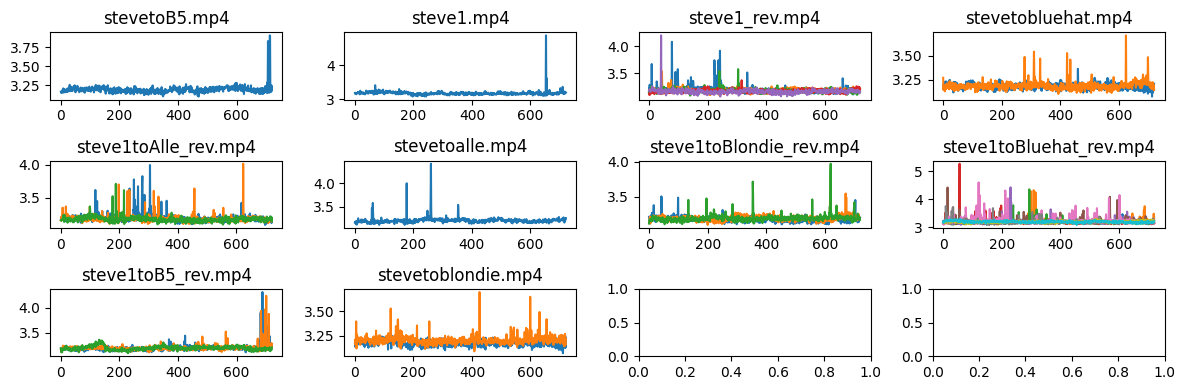

In [6]:
counter = 0
fig, axes = plt.subplots(3, 4, figsize=(12, 4))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    axes_flat[i].plot(avg_units)
    axes_flat[i].set_title(s)
plt.tight_layout()  # automatically adjusts spacing
plt.show()


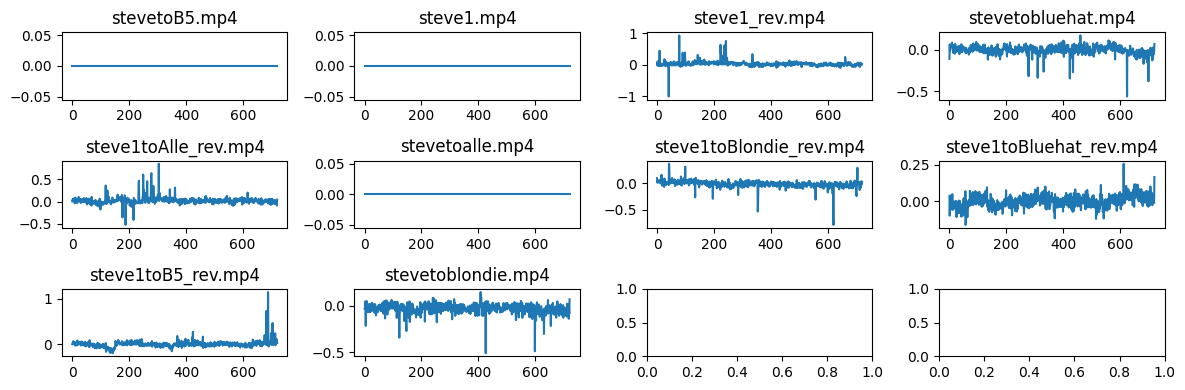

In [7]:
counter = 0
fig, axes = plt.subplots(3, 4, figsize=(12, 4))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    first_vs_last = avg_units[:,0] - avg_units[:,-1]
    axes_flat[i].plot(first_vs_last)
    axes_flat[i].set_title(s)
    counter += 1
plt.tight_layout()  # automatically adjusts spacing
plt.show()

In [8]:
for s in stimuli_names:
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    corrfirst_vs_last = np.corrcoef(avg_units[:-1,0], avg_units[:-1,-1])
    print(corrfirst_vs_last[0,1], f"with {n_repetitions} reps")

1.0 with 1 reps
1.0 with 1 reps
-0.024825880940110744 with 5 reps
-0.09808587940253614 with 2 reps
0.08228366435036709 with 3 reps
1.0 with 1 reps
-0.006722045629780575 with 3 reps
0.032967328835081196 with 10 reps
-0.002512554392645163 with 3 reps
0.018254153091639448 with 2 reps


In [9]:
for s in stimuli_names:
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    corrfirst_vs_last = np.corrcoef(avg_units[:-1,0], avg_units[:-1,-1])
    print(corrfirst_vs_last[0,1], f"with {n_repetitions} reps")
    

1.0 with 1 reps
1.0 with 1 reps
-0.024825880940110744 with 5 reps
-0.09808587940253614 with 2 reps
0.08228366435036709 with 3 reps
1.0 with 1 reps
-0.006722045629780575 with 3 reps
0.032967328835081196 with 10 reps
-0.002512554392645163 with 3 reps
0.018254153091639448 with 2 reps


In [10]:
rev_files = [f for f in stimuli_names if "_rev" in f]

for rev_name in rev_files[1:]:
    orig_name = rev_name.replace("_rev", "")
    if orig_name != "steve1.mp4":
        orig_name = orig_name.replace("1", "")
        if orig_name != "stevetoB5.mp4":
            orig_name = orig_name.replace("B", "b")
        # end if orig_name != "stevetoB5.mp4":
        if orig_name == "stevetoAlle.mp4":
            orig_name = orig_name.replace("A", "a")
    # end if orig_name != "steve1.mp4":
    avg_units = np.mean(data[orig_name], axis=0)[:-1,-1]
    avg_units_rev = np.mean(data[rev_name], axis=0)[:-1,-1][::-1]
    min_size = min(avg_units.shape[0], avg_units_rev.shape[0])
    corrfirst_vs_last = np.corrcoef(avg_units[:min_size], avg_units_rev[:min_size])
    print(corrfirst_vs_last[0,1])

-0.08352327521096171
-0.06967401969637357
0.12845343414033816
0.0075726175506267875


In [11]:
files = ['steve1toB5_rev.mp4', 'stevetoalle.mp4', 'steve1_rev.mp4', 
         'steve1toBluehat_rev.mp4', 'stevetoB5.mp4', 'steve1.mp4', 
         'stevetobluehat.mp4', 'steve1toBlondie_rev.mp4', 'stevetoblondie.mp4']

# Separate reversed and original
rev_files = [f for f in files if "_rev" in f]
orig_files = [f for f in files if "_rev" not in f]
print(rev_files)
print(orig_files)

['steve1toB5_rev.mp4', 'steve1_rev.mp4', 'steve1toBluehat_rev.mp4', 'steve1toBlondie_rev.mp4']
['stevetoalle.mp4', 'stevetoB5.mp4', 'steve1.mp4', 'stevetobluehat.mp4', 'stevetoblondie.mp4']


In [15]:
for s in stimuli_names:
    print(s, data[s].shape[2])

stevetoB5.mp4 1
steve1.mp4 1
steve1_rev.mp4 5
stevetobluehat.mp4 2
steve1toAlle_rev.mp4 3
stevetoalle.mp4 1
steve1toBlondie_rev.mp4 3
steve1toBluehat_rev.mp4 10
steve1toB5_rev.mp4 3
stevetoblondie.mp4 2


In [22]:
s = "steve1toBluehat_rev.mp4"
mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
lp = get_lagplot(mat, max_lag=200, min_datapts=100)

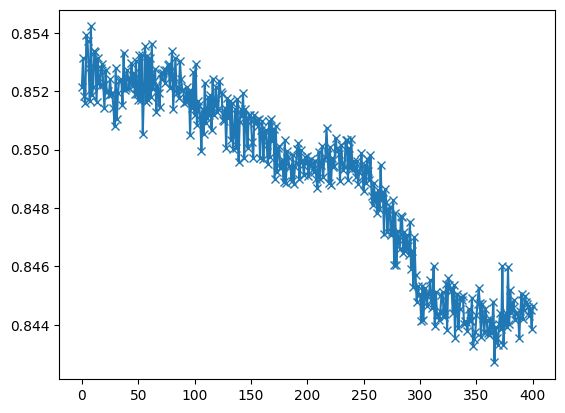

In [23]:
plt.plot(lp, marker="x")

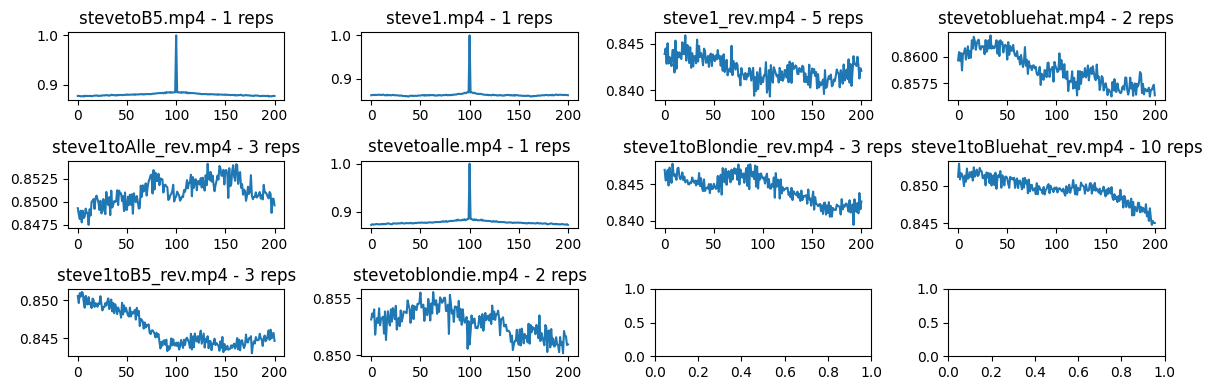

In [26]:
counter = 0
fig, axes = plt.subplots(3, 4, figsize=(12, 4))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    first_vs_last_mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
    axes_flat[i].plot(lp_1st_vs_last)
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.tight_layout()  # automatically adjusts spacing
plt.show()

In [32]:
data_gaze["steve1.mp4"].shape

(383, 722, 1)

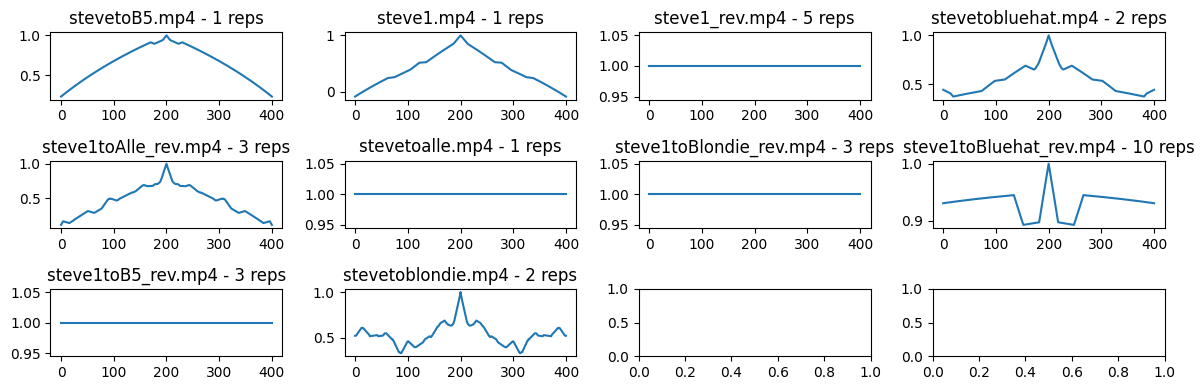

In [77]:
counter = 0
fig, axes = plt.subplots(3, 4, figsize=(12, 4))
axes_flat = axes.ravel()
#fig1, axes1 = plt.subplots(3, 4, figsize=(12, 4))
#axes_flat1 = axes1.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=200, min_datapts=100)
    # axes_flat1[i].imshow(first_vs_last_mat)
    # axes_flat1[i].set_title(f"{s} - {n_repetitions} reps")
    axes_flat[i].plot(lp_1st_vs_last)
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.tight_layout() 
 # automatically adjusts spacing
plt.show()

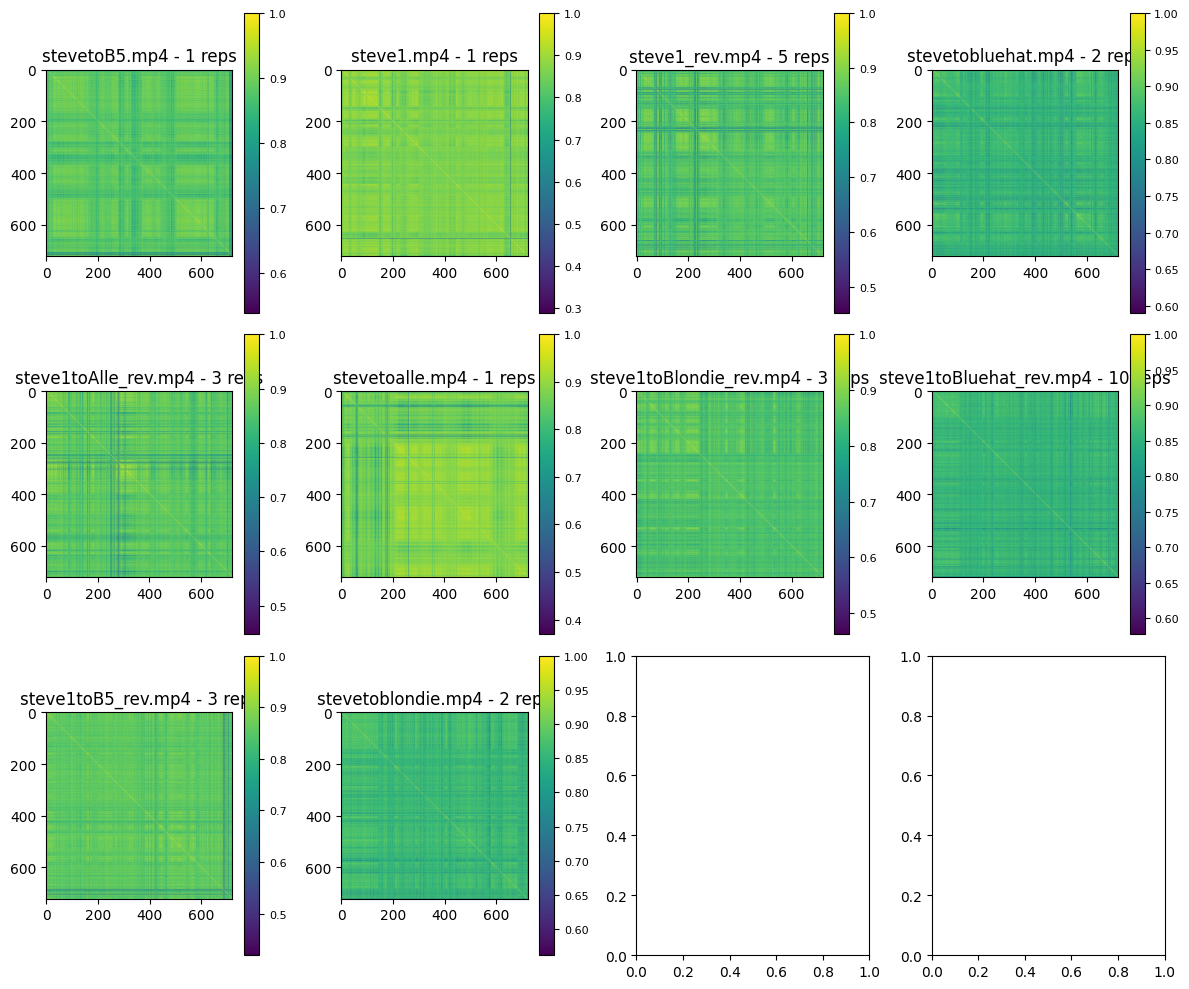

In [97]:
counter = 0
# fig, axes = plt.subplots(3, 4, figsize=(12, 4))
# axes_flat = axes.ravel()
fig1, axes1 = plt.subplots(3, 4, figsize=(12, 10))
axes_flat1 = axes1.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    first_vs_last_mat = autocorr_mat(data[s][:,:,0])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=200, min_datapts=100)
    axes_flat1[i].imshow(first_vs_last_mat)
    axes_flat1[i].set_title(f"{s} - {n_repetitions} reps")
    cbar = fig1.colorbar(axes_flat1[i].images[0], ax=axes_flat1[i])
    cbar.ax.tick_params(labelsize=8)
    
    counter += 1
plt.tight_layout() 
 # automatically adjusts spacing
plt.show()

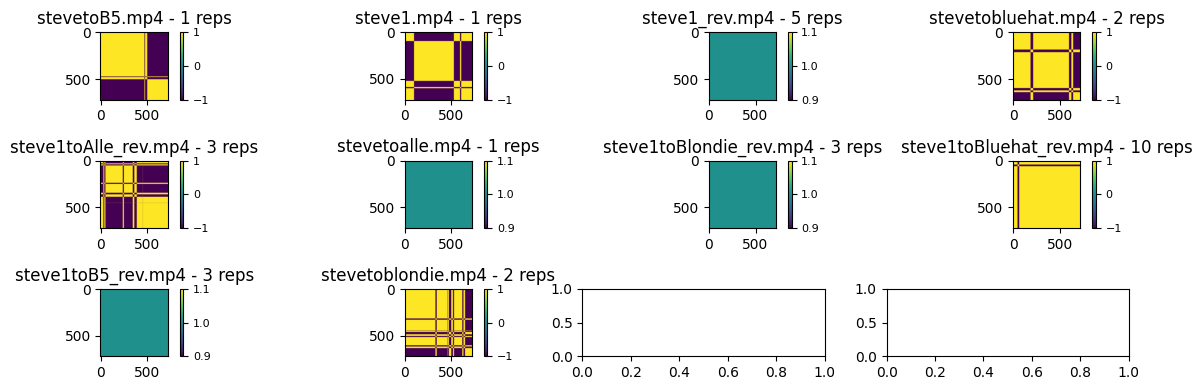

In [70]:
counter = 0
# fig, axes = plt.subplots(3, 4, figsize=(12, 4))
# axes_flat = axes.ravel()
fig1, axes1 = plt.subplots(3, 4, figsize=(12, 4))
axes_flat1 = axes1.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=200, min_datapts=100)
    axes_flat1[i].imshow(first_vs_last_mat)
    axes_flat1[i].set_title(f"{s} - {n_repetitions} reps")
    cbar = fig1.colorbar(axes_flat1[i].images[0], ax=axes_flat1[i])
    cbar.ax.tick_params(labelsize=8)
    
    counter += 1
plt.tight_layout() 
 # automatically adjusts spacing
plt.show()

In [84]:
from scipy.spatial.distance import pdist, squareform

# compute pairwise Euclidean distances between columns
dist_mat = squareform(pdist(data_gaze[s][:,:,0].T, metric='euclidean'))
#np.corrcoef(data_gaze[s][:,:,0], rowvar=False) #, data_gaze[s][0,:,0])

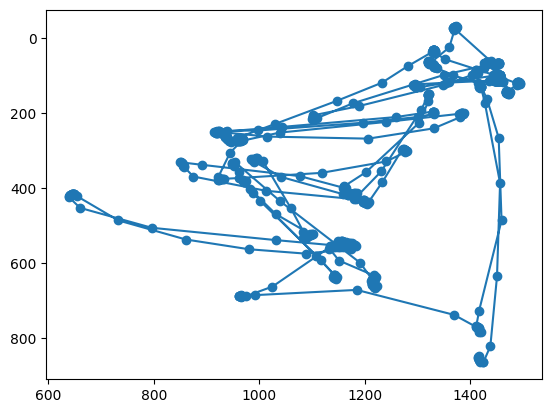

In [95]:
s = "steve1toB5_rev.mp4"
plt.plot(data_gaze[s][0,:,0], data_gaze[s][1,:,0], marker="o")
plt.gca().invert_yaxis()

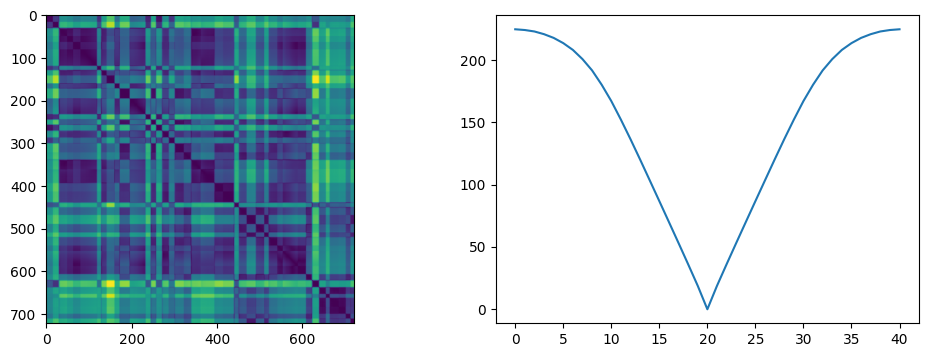

In [94]:
fig1, axes1 = plt.subplots(1, 2, figsize=(12, 4))
axes1[0].imshow(dist_mat)
axes1[1].plot(get_lagplot(dist_mat))

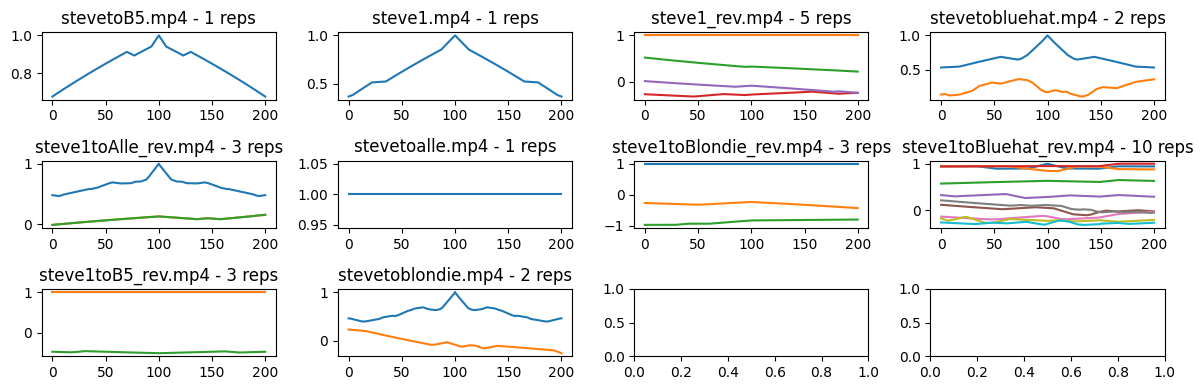

In [41]:
counter = 0
fig, axes = plt.subplots(3, 4, figsize=(12, 4))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    for i_rep in range(n_repetitions):
        first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0], data2=data_gaze[s][:,:,i_rep])
        lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
        axes_flat[i].plot(lp_1st_vs_last)
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.tight_layout()  # automatically adjusts spacing
plt.show()

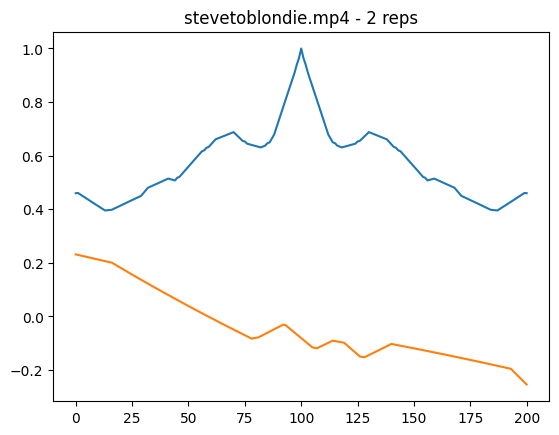

In [39]:
n_repetitions = data_gaze[s].shape[2]
for i_rep in range(n_repetitions):
    first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0], data2=data_gaze[s][:,:,i_rep])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
    plt.plot(lp_1st_vs_last)
    plt.title(f"{s} - {n_repetitions} reps")